In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [133]:
df = pd.read_csv("d:/University/third_course/MTAD/lab2/cleaned_data.csv")


In [134]:
df.drop(columns= ['Unnamed: 0'], inplace=True)
df['Licensed'] = df['Licensed'].map({True: 1, False: 0})
df.rename(columns={'Licensed': 'Is_licensed'}, inplace=True)
df['official_video'] = df['official_video'].map({True: 1, False: 0})
df.rename(columns={'official_video': 'Is_official_video'}, inplace=True)

In [135]:
df = pd.get_dummies(df, columns=['Album_type'], drop_first=True)
df = df.astype({'Album_type_single': 'int', 'Album_type_compilation': 'int'})

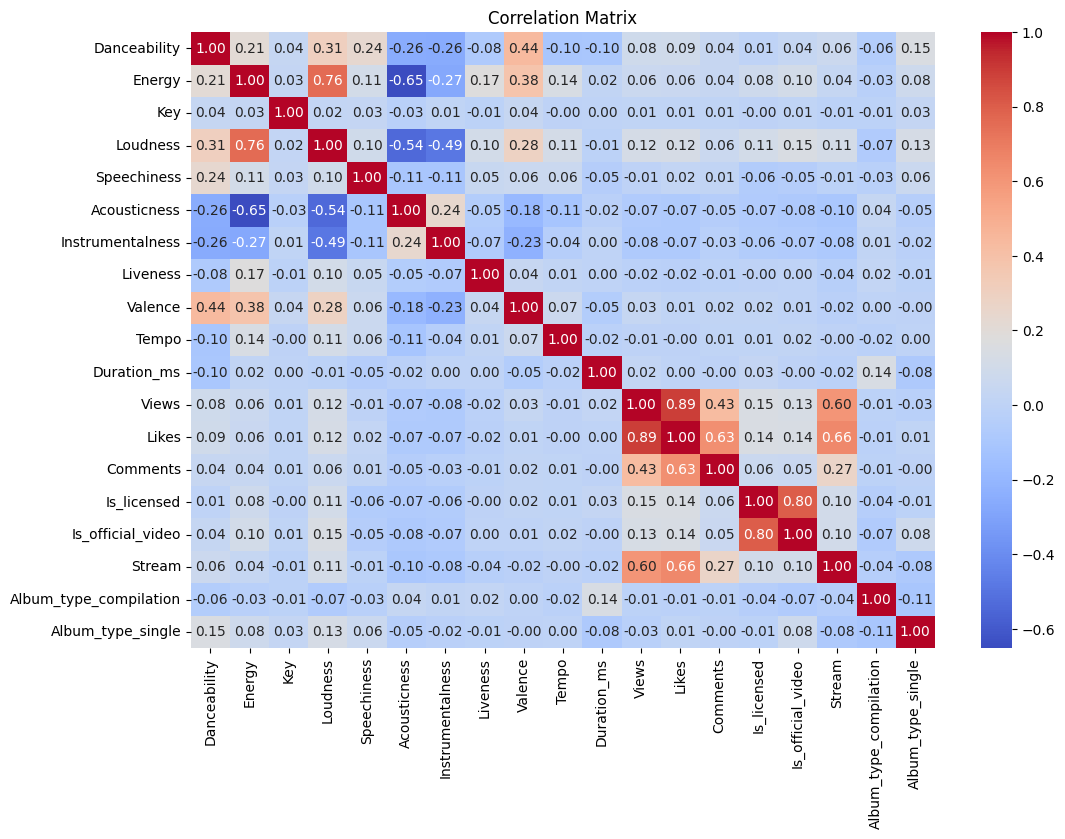

In [136]:
numeric_df = df.select_dtypes(include = ['bool', "number"])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [157]:
y_name = 'Views'
y = df[y_name]
X = df[['Likes', 'Comments', 'Stream']]

In [ ]:
X_with_const = sm.add_constіant(X)
model = sm.OLS(y, X_with_const).fit()

In [159]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Views   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                 2.919e+04
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:01:37   Log-Likelihood:            -3.7390e+05
No. Observations:               18688   AIC:                         7.478e+05
Df Residuals:                   18684   BIC:                         7.478e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.783e+05   9.93e+05      0.180      0.857   -1.77e+06    2.12e+06
Likes        162.0537      0.803    201.841      0.000     160.480     163.627
Comments    -320.3004      5.762    -55.591      0.000    -331.594    -309.007
Stream        -0.0319      0.005     -6.711      0.000      -0.041      -0.023
==============================================================================
Omnibus:                    12017.687   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4581363.101
Skew:                           1.877   Prob(JB):                         0.00
Kurtosis:                      79.613   Cond. No.                     3.28e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_filtered_with_const = sm.add_constant(X_filtered)

# vif = pd.DataFrame()
# vif["Variable"] = X_filtered_with_const.columns
# vif["VIF"] = [variance_inflation_factor(X_filtered_with_const.values, i) for i in range(X_filtered_with_const.shape[1])]

# print(vif)

In [160]:
intercept = model.params[0]
coefficients = model.params[1:]

equation = f"y = {intercept:.3f} + "
equation += " + ".join([f"{coef:.3f}*{col}" for coef, col in zip(coefficients, X.columns)])
print(equation)

y = 178322.119 + 162.054*Likes + -320.300*Comments + -0.032*Stream


C:\Users\grund\AppData\Local\Temp\ipykernel_15916\746730634.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]


In [161]:
coefficients

Likes       162.053746
Comments   -320.300442
Stream       -0.031875
dtype: float64

In [162]:

coefficients_dict = list(zip(X.columns, coefficients))


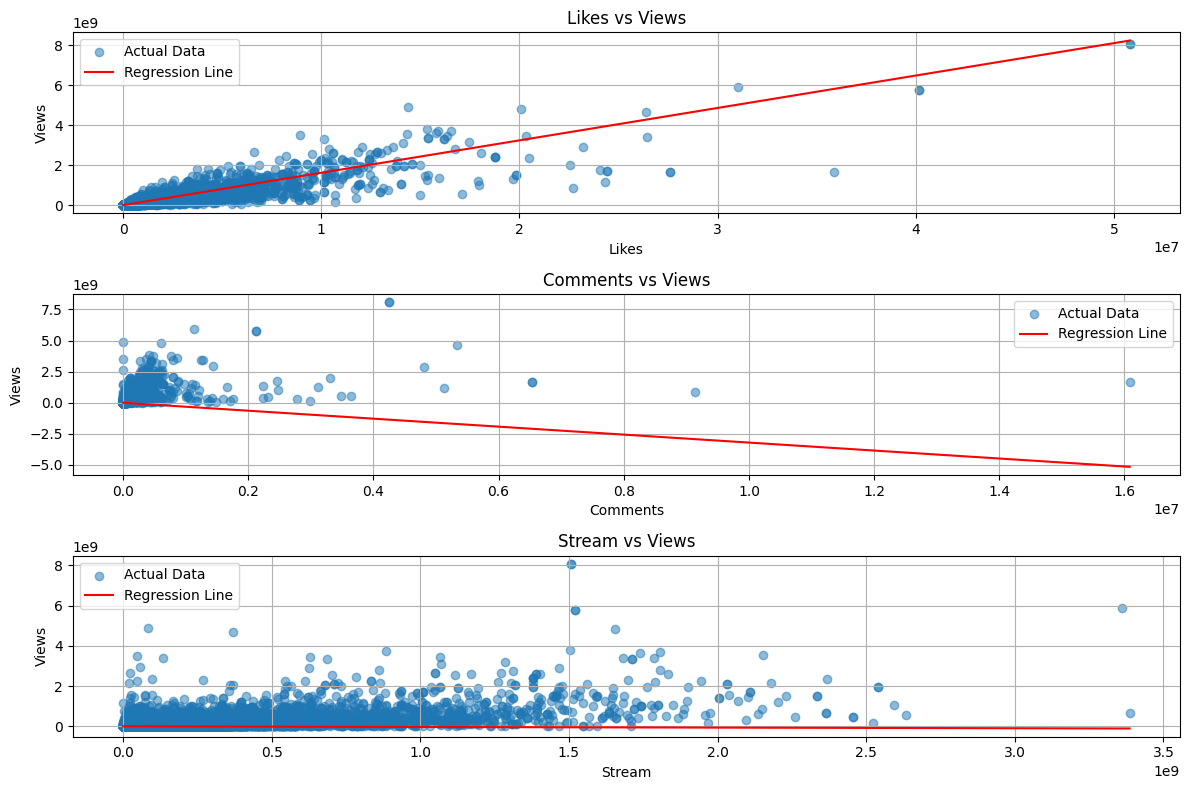

In [163]:

plt.figure(figsize=(12, 8))

for i, (feature, coef) in enumerate(coefficients_dict, start=1):

    plt.subplot(3, 1, i)  # 
    
    plt.scatter(X[feature], y, alpha=0.5, label='Actual Data')
    
    x_values = np.linspace(X[feature].min(), X[feature].max(), 100)
    y_values = intercept + coef * x_values

    plt.plot(x_values, y_values, color='red', label='Regression Line')
    

    plt.title(f'{feature} vs Views')
    plt.xlabel(feature)
    plt.ylabel('Views')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [164]:
y_pred = model.predict(X_with_const)
RSS = ((y - y_pred) ** 2).sum()
print(f"RSS: {RSS:.3f}")
RMSE = (RSS / len(y)) ** 0.5
print(f"RMSE: {RMSE:.3f}")
RSE = (RSS / (len(y) - len(coefficients) - 1)) ** 0.5
print(f"RSE: {RSE:.3f}")
TSS = ((y - y.mean()) ** 2).sum()
R_squared = 1 - RSS / TSS
print(f"R²: {R_squared:.3f}")
t_stats = model.tvalues
print("t-statistics for each coefficient:")
print(t_stats)

RSS: 261405433973255569408.000
RMSE: 118270352.962
RSE: 118283012.353
R²: 0.824
t-statistics for each coefficient:
const         0.179587
Likes       201.841164
Comments    -55.591299
Stream       -6.710820
dtype: float64


In [166]:
from sklearn.preprocessing import StandardScaler

# Целевая переменная
y_name = 'Views'
y = df[y_name]

# Признаки
X = df[['Likes', 'Comments', 'Stream']]

# Инициализация масштабатора
scaler = StandardScaler()

# Масштабируем признаки
X_scaled = scaler.fit_transform(X)

# Преобразуем обратно в DataFrame для удобства
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [171]:
X_with_const_2 = sm.add_constant(X_scaled)
model_2 = sm.OLS(y, X_with_const_2).fit()

In [172]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Views   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                 2.919e+04
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:16:44   Log-Likelihood:            -3.7390e+05
No. Observations:               18688   AIC:                         7.478e+05
Df Residuals:                   18684   BIC:                         7.478e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.884e+07   8.65e+05    114.233      0.000    9.71e+07    1.01e+08
Likes       2.971e+08   1.47e+06    201.841      0.000    2.94e+08       3e+08
Comments   -6.411e+07   1.15e+06    -55.591      0.000   -6.64e+07   -6.18e+07
Stream     -7.947e+06   1.18e+06     -6.711      0.000   -1.03e+07   -5.63e+06
==============================================================================
Omnibus:                    12017.687   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4581363.101
Skew:                           1.877   Prob(JB):                         0.00
Kurtosis:                      79.613   Cond. No.                         3.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
X_new = pd.DataFrame({
    'Likes': [321312, 143364, 1211111],
    'Comments': [33324, 323, 21222],
    'Stream': [2211111,22321, 23234],
})

X_new_with_const = sm.add_constant(X_new)

forecast = model.predict(X_new_with_const)
print("Forecasted Views for the next 3 steps:", forecast)

Forecasted Views for the next 3 steps: 0    4.150397e+07
1    2.330683e+07
2    1.896452e+08
dtype: float64
